In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/AbdullahJaffrey/Datasets/master/stocks.csv')

In [3]:
df.head(3)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,General merchandisers,"572,754",2.4%,"2,300,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"469,822",21.7%,"1,608,000","Seattle, Washington"
2,3,Apple,Electronics industry,"365,817",33.2%,"154,000","Cupertino, California"


In [4]:
df.columns = ['Rank', 'Name', 'Industry', 'RevenueInUSD', 'Revenuegrowth',
       'Employees', 'Headquarters']

In [5]:
df.Revenuegrowth = df.Revenuegrowth.apply(lambda x: x.replace('%','')).astype('float')

In [6]:
df.Employees = df.Employees.apply(lambda x: x.replace(',','')).astype('int64')
df.RevenueInUSD = df.RevenueInUSD.apply(lambda x: x.replace(',','')).astype('int64')

<AxesSubplot:>

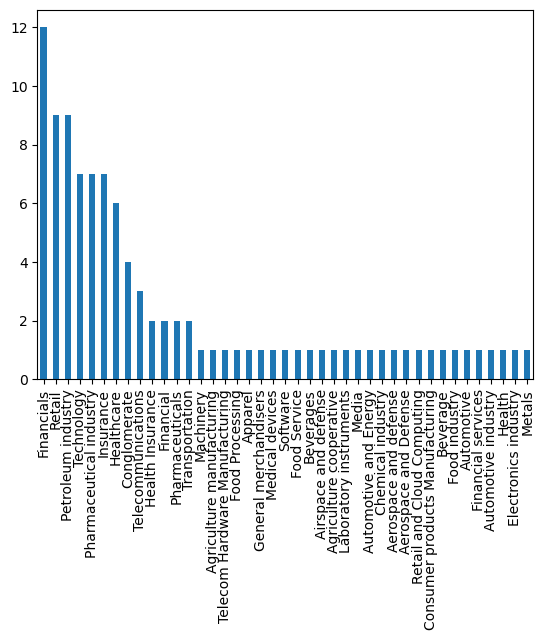

In [7]:
df.Industry.value_counts().plot(kind='bar')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
X = df.drop(['RevenueInUSD', 'Name', 'Industry', 'Headquarters'
            ], axis=1)
y = df.RevenueInUSD

In [10]:
y

0     572754
1     469822
2     365817
3     292111
4     287597
       ...  
95     38469
96     38448
97     37470
98     36751
99     36484
Name: RevenueInUSD, Length: 100, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1711287966.222837


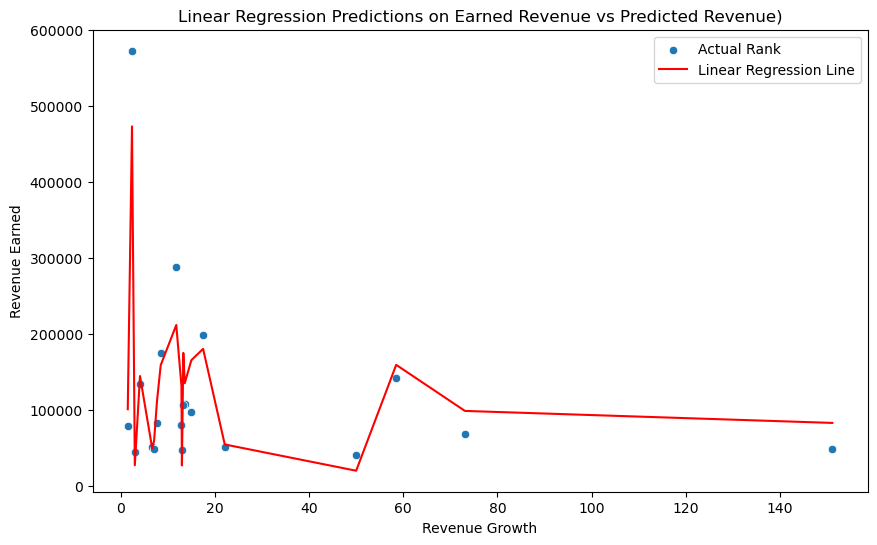

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Revenuegrowth'], y=y_test, label='Actual Rank')
sns.lineplot(x=X_test['Revenuegrowth'], y=y_pred, color='red', label='Linear Regression Line')
plt.title(f'Linear Regression Predictions on Earned Revenue vs Predicted Revenue)')
plt.xlabel('Revenue Growth')
plt.ylabel('Revenue Earned')
plt.legend()
plt.show()

In [16]:
X_test.sample(1)

,Rank,Revenuegrowth,Employees
70,71,6.7,67500


In [17]:
print('Predicted Revenue Earned: ')
model.predict([[11, 17.5, 181000]])

Predicted Revenue Earned: 


C:\Users\abdul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([180061.66237198])

In [18]:
y_test[X_test['Rank'] == 31]

30    106995
Name: RevenueInUSD, dtype: int64

In [19]:
# Done